## Exploring the MITI dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os

In [24]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df = pd.read_excel(interim_dir+'secondary_categorisations_new_universe_061123.xlsx', index_col = [0] )

In [4]:
import sys

In [5]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)


In [9]:
from model_functions import *

In [6]:
tsca_chems = df[df['TSCA_STATUS'] != 'unclassified']

In [7]:
tsca_chems_dict = {k:Chem.MolFromSmiles(v) for k,v in zip(tsca_chems['dtxsid'], tsca_chems['smiles'])}

In [10]:
tsca_chems_fp = mk_fp(tsca_chems)

In [11]:
tsca_chems_fp['source'] = 'tsca'

In [12]:
miti = pd.read_excel(external_dir+'MITI _1559 chem_February_2018.xlsx')

In [13]:
miti_fp = mk_fp(miti)

[13:17:09] SMILES Parse Error: syntax error while parsing: CCc1ccc(C=C)cc1_CCc1cccc(C=C)c1_CCc1ccccc1C=C
[13:17:09] SMILES Parse Error: Failed parsing SMILES 'CCc1ccc(C=C)cc1_CCc1cccc(C=C)c1_CCc1ccccc1C=C' for input: 'CCc1ccc(C=C)cc1_CCc1cccc(C=C)c1_CCc1ccccc1C=C'
[13:17:09] SMILES Parse Error: syntax error while parsing: CCCCCCCCc1ccc(Nc2ccc(CCCCCCCC)cc2)cc1_CCCCCCCCc1cccc(Nc2ccc(CCCCCCCC)cc2)c1_CCCCCCCCc1cccc(Nc2cccc(CCCCCCCC)c2)c1_CCCCCCCCc1ccccc1Nc1cccc(CCCCCCCC)c1_CCCCCCCCc1ccccc1Nc1ccccc1CCCCCCCC
[13:17:09] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCCc1ccc(Nc2ccc(CCCCCCCC)cc2)cc1_CCCCCCCCc1cccc(Nc2ccc(CCCCCCCC)cc2)c1_CCCCCCCCc1cccc(Nc2cccc(CCCCCCCC)c2)c1_CCCCCCCCc1ccccc1Nc1cccc(CCCCCCCC)c1_CCCCCCCCc1ccccc1Nc1ccccc1CCCCCCCC' for input: 'CCCCCCCCc1ccc(Nc2ccc(CCCCCCCC)cc2)cc1_CCCCCCCCc1cccc(Nc2ccc(CCCCCCCC)cc2)c1_CCCCCCCCc1cccc(Nc2cccc(CCCCCCCC)c2)c1_CCCCCCCCc1ccccc1Nc1cccc(CCCCCCCC)c1_CCCCCCCCc1ccccc1Nc1ccccc1CCCCCCCC'
[13:17:09] SMILES Parse Error: syntax error while parsin

In [14]:
miti_fp['source'] = 'miti'

In [15]:
all_df = pd.concat([miti_fp, tsca_chems_fp])

In [16]:
all_df

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_6,mrgn_7,mrgn_8,mrgn_9,...,mrgn_1015,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1021,mrgn_1022,mrgn_1023,source
DTXSID1025227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miti
DTXSID6027268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miti
DTXSID2060884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miti
ID1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miti
DTXSID2020761,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,miti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID70881282,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tsca
DTXSID10881281,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tsca
DTXSID20897297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tsca
DTXSID40420521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tsca


In [18]:
from sklearn.manifold import TSNE

In [19]:
model2 = TSNE(learning_rate = 200, random_state = 42)

In [20]:
tsne_bio = model2.fit_transform(all_df.iloc[:,:-1])

In [21]:
tsne_bio_df = pd.concat([pd.DataFrame(tsne_bio, index = all_df.index, columns = ['tsne_x', 'tsne_y']), all_df.iloc[:,-1]], axis = 1)


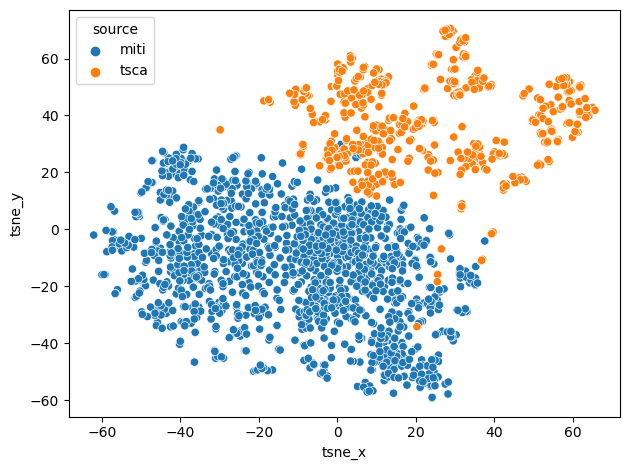

In [22]:
sns.scatterplot(x="tsne_x", y="tsne_y",  hue = 'source',  
                     data=tsne_bio_df)

plt.tight_layout()
plt.savefig(figures_dir+'FigureS9_061123.png', dpi = 300)


In [27]:
catalogic = pd.read_excel(processed_dir+'catalogic_tsca_out.xlsx', sheet_name = 'Sheet2')

In [29]:
catalogic.columns

Index(['#', 'Cas#', 'Chem. Name', 'Smiles', 'Quantity [mol/mol parent]',
       'log Kow', 'Molecular weight Da', 'Water solubility (FR) mg/L',
       'Number of rings', 'Number of single bonds', 'Number of double bonds',
       'Number of aromatic bonds', 'Number of cyclic bonds', 'Mixture/Salt',
       'Microbial toxicity', 'Map reliability', 'BOD_Observed [28.00 days]',
       'BOD [28.00 days]', '±_BOD [28.00 days]', 'Number of tautomers',
       'Excess BOD', 'Primary Half Life', 'Ultimate Half Life Predicted',
       'Estimated half life by BOD obs.', 'Parameter ranges',
       'Structural domain', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Mechanistic domain', 'Total Domain', 'Remark'],
      dtype='object')

In [30]:
catalogic.rename(columns = {'Structural domain': 'Structural domain_correct', 'Unnamed: 26' :  'Structural domain_incorrect', 'Unnamed: 27': 'Structural domain_unknown','Unnamed: 28': 'Structural domain_total'}, inplace = True)

In [35]:
catalogic = catalogic.iloc[1:860,:]

In [41]:
len(catalogic[catalogic['Remark'].notnull()]['Chem. Name'].tolist())

17

In [46]:
catalogic[catalogic['Remark'].notnull()]['Chem. Name'].tolist()

['DTXSID6021377',
 'DTXSID8026434',
 'DTXSID0041226',
 'DTXSID8031861',
 'DTXSID0059798',
 'DTXSID0027141',
 'DTXSID60871632',
 'DTXSID8052019',
 'DTXSID8031865',
 'DTXSID0059879',
 'DTXSID3059921',
 'DTXSID7059933',
 'DTXSID7029904',
 'DTXSID3031864',
 'DTXSID8037706',
 'DTXSID8037708',
 'DTXSID9059832']

In [44]:
catalogic['Structural domain_total'].value_counts(normalize = True)

Out of domain    0.696401
In domain        0.303599
Name: Structural domain_total, dtype: float64

In [45]:
catalogic['Total Domain'].value_counts(normalize = True)

Out of Domain    0.696401
In domain        0.303599
Name: Total Domain, dtype: float64